In [24]:
#spotify data download

#%env SPOTIPY_CLIENT_ID='a1e8622e487a4b2aba7c5439b56cc5a5'
import pandas as pd
mysongs = pd.read_csv("df.csv") 

In [25]:
print(mysongs.shape)
display(mysongs.head())

(110, 19)


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.680,0.579,3,-6.804,1,0.0400,0.85200,0.000037,0.1020,0.602,93.088,audio_features,6kXzroTvu7rGdvrPnQRh9X,spotify:track:6kXzroTvu7rGdvrPnQRh9X,https://api.spotify.com/v1/tracks/6kXzroTvu7rG...,https://api.spotify.com/v1/audio-analysis/6kXz...,316627,4
1,1,0.516,0.515,11,-7.611,1,0.0258,0.19800,0.048600,0.0988,0.448,140.026,audio_features,20nWVcL69RbD6xF1mafrHO,spotify:track:20nWVcL69RbD6xF1mafrHO,https://api.spotify.com/v1/tracks/20nWVcL69RbD...,https://api.spotify.com/v1/audio-analysis/20nW...,371143,4
2,2,0.549,0.731,0,-4.457,1,0.0329,0.14500,0.000233,0.1020,0.381,124.028,audio_features,1a2j7JrHRp44ypxomUC68E,spotify:track:1a2j7JrHRp44ypxomUC68E,https://api.spotify.com/v1/tracks/1a2j7JrHRp44...,https://api.spotify.com/v1/audio-analysis/1a2j...,274695,4
3,3,0.522,0.256,10,-11.216,1,0.0258,0.86000,0.000825,0.1420,0.130,76.350,audio_features,1fYouLdK3PkOMPnx4CPxTY,spotify:track:1fYouLdK3PkOMPnx4CPxTY,https://api.spotify.com/v1/tracks/1fYouLdK3PkO...,https://api.spotify.com/v1/audio-analysis/1fYo...,296387,4
4,4,0.719,0.708,0,-7.418,1,0.0417,0.00645,0.201000,0.0640,0.256,126.015,audio_features,29MOOOmMRPeWyPwKQFoF5t,spotify:track:29MOOOmMRPeWyPwKQFoF5t,https://api.spotify.com/v1/tracks/29MOOOmMRPeW...,https://api.spotify.com/v1/audio-analysis/29MO...,254453,4


In [26]:
public_songs1 = pd.read_csv(r'/Users/Will/Documents/Spotipy/the-spotify-hit-predictor-dataset/dataset-of-00s.csv') 
public_songs2 = pd.read_csv(r'/Users/Will/Documents/Spotipy/the-spotify-hit-predictor-dataset/dataset-of-10s.csv') 
public_songs3 = pd.read_csv(r'/Users/Will/Documents/Spotipy/the-spotify-hit-predictor-dataset/dataset-of-60s.csv') 
public_songs4 = pd.read_csv(r'/Users/Will/Documents/Spotipy/the-spotify-hit-predictor-dataset/dataset-of-70s.csv') 
public_songs5 = pd.read_csv(r'/Users/Will/Documents/Spotipy/the-spotify-hit-predictor-dataset/dataset-of-80s.csv') 
public_songs6 = pd.read_csv(r'/Users/Will/Documents/Spotipy/the-spotify-hit-predictor-dataset/dataset-of-90s.csv') 

In [27]:
public_songs = pd.concat([public_songs1, public_songs2, public_songs3, public_songs4, public_songs5, public_songs6])
print(public_songs.shape)
display(public_songs.head())

(41106, 19)


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [28]:
import sklearn
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [29]:
print(mysongs.columns)

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')


In [30]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','duration_ms', 'time_signature']
print(len(cols))

13


In [31]:
X = np.array(mysongs.loc[:,cols])

In [32]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

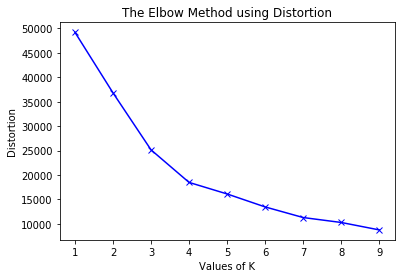

In [33]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

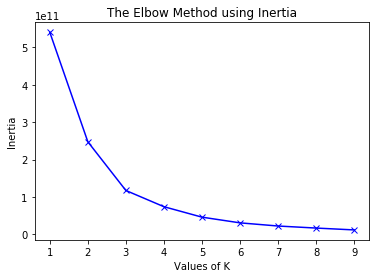

In [34]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [35]:
kmeans = KMeans(n_clusters=4).fit(X)
centers = np.array(kmeans.cluster_centers_)
print(centers)

[[ 5.93740741e-01  6.14333333e-01  5.70370370e+00 -8.07522222e+00
   7.03703704e-01  7.48296296e-02  3.96447037e-01  8.76954926e-02
   2.04844444e-01  5.14777778e-01  1.12865296e+02  2.91404111e+05
   4.07407407e+00]
 [ 6.34807692e-01  5.62615385e-01  5.57692308e+00 -8.98173077e+00
   8.07692308e-01  1.59838462e-01  3.77902808e-01  1.45314284e-01
   2.51384615e-01  5.62846154e-01  1.16730192e+02  1.69337923e+05
   3.84615385e+00]
 [ 5.51000000e-01  6.00875000e-01  8.12500000e+00 -8.22125000e+00
   7.50000000e-01  4.69625000e-02  2.93476250e-01  1.74267500e-01
   1.15900000e-01  5.16875000e-01  1.32927125e+02  4.23606250e+05
   3.87500000e+00]
 [ 5.90224490e-01  5.94612245e-01  5.87755102e+00 -8.00634694e+00
   6.73469388e-01  1.17140816e-01  3.50224392e-01  6.91376245e-02
   1.93789796e-01  4.70477551e-01  1.20438245e+02  2.34665673e+05
   4.00000000e+00]]


In [41]:
df_1 = pd.DataFrame(X)
predict=kmeans.predict(X)
df_1['cluster'] = pd.Series(predict, index=df_1.index)

In [42]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'cluster']
df_1.columns = cols

In [45]:
y = df_1.loc[:,'cluster'].astype(str)
print(y.unique())
df_1.head()

['0' '2' '3' '1']


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.680,0.579,3.0,-6.804,1.0,0.0400,0.85200,0.000037,0.1020,0.602,93.088,316627.0,4.0,0
1,0.516,0.515,11.0,-7.611,1.0,0.0258,0.19800,0.048600,0.0988,0.448,140.026,371143.0,4.0,2
2,0.549,0.731,0.0,-4.457,1.0,0.0329,0.14500,0.000233,0.1020,0.381,124.028,274695.0,4.0,0
3,0.522,0.256,10.0,-11.216,1.0,0.0258,0.86000,0.000825,0.1420,0.130,76.350,296387.0,4.0,0
4,0.719,0.708,0.0,-7.418,1.0,0.0417,0.00645,0.201000,0.0640,0.256,126.015,254453.0,4.0,3


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:1][0]

array([6.39118457e-01, 5.62656642e-01, 2.72727273e-01, 7.01037388e-01,
       1.00000000e+00, 1.69564284e-02, 9.08315057e-01, 4.09388646e-05,
       8.01733478e-02, 6.08938547e-01, 2.45028347e-01, 4.49202761e-01,
       5.00000000e-01])

In [63]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X,y)
y_pred = clf.predict(X)
from sklearn.metrics import accuracy_score
print(y_pred)
print(accuracy_score(y,y_pred))

['0' '2' '0' '0' '3' '3' '1' '0' '3' '0' '0' '0' '3' '3' '1' '3' '1' '1'
 '3' '3' '2' '3' '0' '3' '3' '3' '3' '3' '3' '1' '3' '1' '1' '3' '0' '1'
 '3' '3' '3' '3' '1' '3' '1' '3' '3' '1' '0' '3' '3' '3' '1' '0' '0' '0'
 '1' '1' '2' '3' '0' '1' '1' '3' '1' '3' '0' '3' '3' '3' '0' '1' '0' '2'
 '1' '3' '2' '0' '0' '2' '1' '0' '3' '3' '0' '1' '1' '2' '3' '3' '0' '0'
 '3' '1' '3' '3' '3' '3' '0' '1' '0' '1' '3' '3' '0' '3' '3' '1' '0' '2'
 '3' '3']
1.0


In [23]:
X_pub_songs = clf.predict(public_songs[cols])
y_pred_pub = clf.predict(X_pub_songs)

KeyError: "['cluster_centers'] not in index"